In [1]:
# author: Jian Zhao <jianzhao@uwaterloo.ca>
# a script for generating horizontal stacked bar charts from Likert scale rating data

import os.path
import sys
import csv
import math
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

In [2]:
axis_labelsize = 12
tick_labelsize = 8

# fname: file name
# questions: [question text], a list of questions
# data: [techniques X questions X participants], a 3D array of raw ratings
# conditions: [technique name], a list of names for the techniques
# rcolors: [Likert scale color], a list of colors, each representing a Likert rating category
# rlabels: [Likert scale label], a list of text labels, each representing a Likert rating category 
# shift: boolean, whether shifting the bars based on the netural ratings
# figsize: (w, h), the size of a subplot

def likertScaleChart(fname, questions, data, conditions, rcolors, rlabels, shift=False, figsize=(5, 3)):
    print('generating chart with ratings...')

    # processing data
    bins = np.arange(0.5, len(rcolors)+1, 1)
    hists = []
    histscum = []
    offsets = []
    total_count = len(data[0][0])

    for i in range(len(conditions)):
        hists.append(np.zeros((len(questions), len(rcolors))))
        for j in range(len(questions)):
            bindata, binedges = np.histogram(data[i][j], bins=bins)
            hists[i][j, :] = bindata
        histscum.append(hists[i].cumsum(axis=1))

        offsets.append([])
        for j in range(len(questions)):
            low = int(len(rcolors) / 2) - 1
            offset = total_count / 2.0 - (histscum[i][j, low] + histscum[i][j, low + 1]) / 2.0
            offsets[i].append(offset)

    # drawing figure
    fig = plt.figure(figsize=(figsize[0]*len(conditions), figsize[1]))
    gs = gridspec.GridSpec(1, len(conditions), hspace=1, wspace=0.05)
    axh = [None] * len(rcolors)

    for i in range(len(conditions)):
        # axes setting
        ax = plt.subplot(gs[0, i])
        ax.invert_yaxis()
        ax.set_yticklabels(questions, size=axis_labelsize)
        ax.xaxis.set_visible(False)
        ax.margins(x=0, y=0)
        if shift:
            ax.set_xlim(min(offsets[i]), total_count + max(offsets[i]))
        else:
            ax.set_xlim(0, total_count)
        ax.set_title(conditions[i], size=axis_labelsize)

        if i != 0:
            ax.set_yticklabels([])

        # 25%, 50%, 75% lines
        if shift:
            delta = 1.0 / len(questions)
            for j in range(len(questions)):
                for ln in [0.25, 0.5, 0.75]:
                    ax.axvline(total_count * ln + offsets[i][j], 1 - j * delta, 1 - (j + 1) * delta, color='0.2', lw=1, ls='--')
        else:
            for ln in [0.25, 0.5, 0.75]:
                ax.axvline(total_count * ln, 0, 1, color='0.5', lw=1, ls='--') 

        # bars
        for j in range(len(rcolors)):
            bar_width = hists[i][:, j]
            if shift:
                bar_start = histscum[i][:, j] - bar_width + offsets[i]
            else:
                bar_start = histscum[i][:, j] - bar_width
            bars = ax.barh(questions, bar_width, left=bar_start, height=0.85, label=str(j), color=rcolors[j])

            for b in range(len(questions)):
                if bar_width[b] != 0: 
                    ax.annotate(int(bar_width[b]), xy=(bar_start[b] + bar_width[b] / 2, b), ha='center', va='center', style='italic') 
            
            axh[j] = bars


    # overall legend
    plt.figlegend(axh, rlabels, loc='lower center', fontsize=8, ncol=len(rcolors))
    # saving figure
    fig.savefig(fname, format='pdf', bbox_inches='tight')
    print('chart saved to ' + fname)

generating chart with ratings...
chart saved to test1.pdf
generating chart with ratings...
chart saved to test2.pdf
generating chart with ratings...
chart saved to test3.pdf


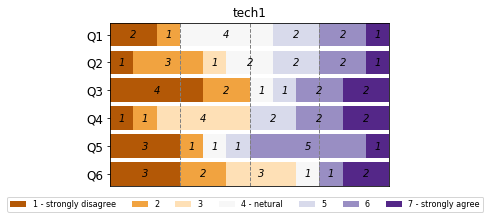

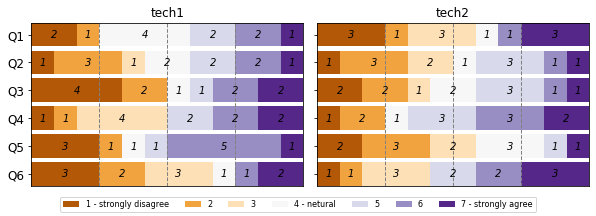

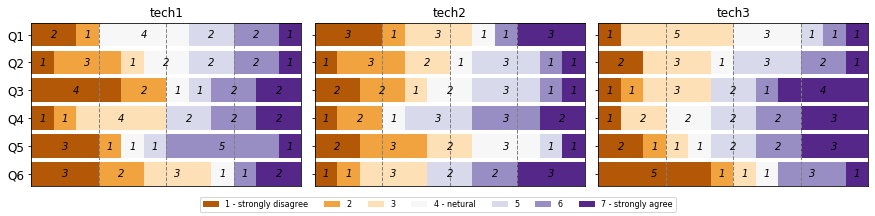

In [3]:
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']  # the text of questions
rcolors = ['#b35806','#f1a340','#fee0b6','#f7f7f7','#d8daeb','#998ec3','#542788'] # 7-point Likert Scale, recommend to use ColorBrewer
rlabels = ['1 - strongly disagree', '2', '3', '4 - netural', '5', '6', '7 - strongly agree'] # 7-point Likert Scale labels

# test with random data (12 participants)
rmax = len(rcolors)
rating1 = np.random.randint(1, rmax+1, (len(questions), 12))
rating2 = np.random.randint(1, rmax+1, (len(questions), 12))
rating3 = np.random.randint(1, rmax+1, (len(questions), 12))

likertScaleChart('test1.pdf', questions, [rating1], ['tech1'], rcolors, rlabels)
likertScaleChart('test2.pdf', questions, [rating1, rating2], ['tech1', 'tech2'], rcolors, rlabels)
likertScaleChart('test3.pdf', questions, [rating1, rating2, rating3], ['tech1', 'tech2', 'tech3'], rcolors, rlabels)